In [1]:
# libs 
from PIL import Image
import matplotlib.patches as patches
import matplotlib as mpl
from glob import glob
import xml.etree.ElementTree as elemTree
import math 
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import exposure

In [2]:
import tifffile as tiff

In [3]:
'''
브라질1 : IMG_PHR1A_PMS_202308231258461_PRJ_6796002101_R1C1.TIF 
브라질2 : IMG_PHR1B_PMS_202308221306229_PRJ_6796003101_R1C1.TIF
마닐라1 : /mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/manila/6796004101/IMG_PHR1B_PMS_001/IMG_PHR1B_PMS_202211270223398_PRJ_6796004101_R1C1.TIF
부산1   : /mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/pusan/6796005101/IMG_PHR1B_PMS_001/IMG_PHR1B_PMS_202211270218038_PRJ_6796005101_R1C1.TIF
blacksky clean: /mnt/hdd/eric/.tmp_ipy/00.Data/Black_Sky/BSG-116-20221118-011730-46830236_ortho.tif
blacksky dirty: /mnt/hdd/eric/.tmp_ipy/00.Data/Black_Sky/BSG-115-20221214-062555-52401363_ortho_dirty.tif

'''


'\n브라질1 : IMG_PHR1A_PMS_202308231258461_PRJ_6796002101_R1C1.TIF \n브라질2 : IMG_PHR1B_PMS_202308221306229_PRJ_6796003101_R1C1.TIF\n마닐라1 : /mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/manila/6796004101/IMG_PHR1B_PMS_001/IMG_PHR1B_PMS_202211270223398_PRJ_6796004101_R1C1.TIF\n부산1   : /mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/pusan/6796005101/IMG_PHR1B_PMS_001/IMG_PHR1B_PMS_202211270218038_PRJ_6796005101_R1C1.TIF\nblacksky clean: /mnt/hdd/eric/.tmp_ipy/00.Data/Black_Sky/BSG-116-20221118-011730-46830236_ortho.tif\nblacksky dirty: /mnt/hdd/eric/.tmp_ipy/00.Data/Black_Sky/BSG-115-20221214-062555-52401363_ortho_dirty.tif\n\n'

In [4]:
'''

/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20220420015713_05989_00098475_L1G/C1_20220420015713_05989_00098475_L1G_P.tif
/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20220420015713_05989_00121564_L1G/C1_20220420015713_05989_00121564_L1G_P.tif
/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221024015617_08833_00052297_L1G/C1_20221024015617_08833_00052297_L1G_P.tif
/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221103014737_08985_00027843_L1G/C1_20221103014737_08985_00027843_L1G_P.tif
/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221222015147_09730_00028974_L1G/C1_20221222015147_09730_00028974_L1G_P.tif
/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221227015155_09806_00006119_L1G/C1_20221227015155_09806_00006119_L1G_P.tif

'''

'\n\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20220420015713_05989_00098475_L1G/C1_20220420015713_05989_00098475_L1G_P.tif\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20220420015713_05989_00121564_L1G/C1_20220420015713_05989_00121564_L1G_P.tif\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221024015617_08833_00052297_L1G/C1_20221024015617_08833_00052297_L1G_P.tif\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221103014737_08985_00027843_L1G/C1_20221103014737_08985_00027843_L1G_P.tif\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221222015147_09730_00028974_L1G/C1_20221222015147_09730_00028974_L1G_P.tif\n/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20221227015155_09806_00006119_L1G/C1_20221227015155_09806_00006119_L1G_P.tif\n\n'

In [4]:
# Image.MAX_IMAGE_PIXELS = None
# im = Image.open("/mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/brazil_1/6796002101/IMG_PHR1A_PMS_001/IMG_PHR1A_PMS_202308231258461_PRJ_6796002101_R1C1.TIF")

In [5]:
import rasterio 

def convert(img, target_type_min, target_type_max, target_type):  # 16 bit to 0~1 (float32) / 16 bit to 0~255 (8bit uint)
    img_min = img.min()
    img_max = img.max()
    a = (target_type_max - target_type_min) / (img_max - img_min)
    b = target_type_max - a * img_max
    new_img = (a * img + b).astype(target_type)
    return new_img



File = f"/mnt/hdd/eric/.tmp_ipy/00.Data/ISRT/230922/C1_20220420015713_05989_00098475_L1G/C1_20220420015713_05989_00098475_L1G_P.tif"


NIR_ = False
if NIR_ :
    SAT_DATA = rasterio.open(File)
    Band_Red, Band_Green, Band_Blue, Band_NIR = SAT_DATA.read()
    SAT_IMG = np.stack([Band_Red, Band_Green, Band_Blue, Band_NIR], axis=-1)
    processed_SAT_IMG = convert(SAT_IMG, 0, 1, np.float32)
    red = processed_SAT_IMG[:,:,0]
    green = processed_SAT_IMG[:,:,1]
    blue = processed_SAT_IMG[:,:,2]
    nir = processed_SAT_IMG[:,:,3]
    rgb = np.stack([red, green, blue], axis=-1)
else:
    SAT_DATA = rasterio.open(File)
    Band_Red, Band_Green, Band_Blue = SAT_DATA.read()
    SAT_IMG = np.stack([Band_Red, Band_Green, Band_Blue], axis=-1)
    processed_SAT_IMG = convert(SAT_IMG, 0, 1, np.float32)
    red = processed_SAT_IMG[:,:,0]
    green = processed_SAT_IMG[:,:,1]
    blue = processed_SAT_IMG[:,:,2]
    rgb = np.stack([red, green, blue], axis=-1)

ValueError: not enough values to unpack (expected 3, got 1)

In [13]:
def contrast_stretch_mb(img):  # 너무밝은 2% 너무어두운 2% 버리기
    img_temp = img
    for b in range(0,img_temp.shape[2]):
        p2, p98 = np.percentile(img_temp[:, :, b], (2, 98))
        img_scaled = exposure.rescale_intensity(img_temp, in_range=(p2, p98))
        img_temp[:, :, b] = img_scaled[:, :, b]
    return img_temp
rgb_contrast = contrast_stretch_mb(rgb.copy())

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(rgb_contrast)

In [ ]:
# 1 
# 일단 png 로 저장한다음에, 16000 x 16000 짜리 통으로 infer 에 집어넣어 보기 

# 2 
# 1024

In [14]:
rgb_contrast.shape

(8321, 6812, 3)

In [15]:
import matplotlib.image

matplotlib.image.imsave("./black_sky_02_dirty.png", rgb_contrast)

In [15]:
im_copy = Image.open("/mnt/hdd/eric/.tmp_ipy/00.Reproduction_Test/test1 copy.png")

In [19]:
rgb_contrast.shape

(16384, 16384, 3)

In [20]:
rgb_contrast.shape[0] // 1024

16

In [21]:
a = 1

In [4]:
img = tiff.imread("/mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/6796002101/IMG_PHR1A_PMS_001/IMG_PHR1A_PMS_202308231258461_PRJ_6796002101_R1C1.TIF")

In [12]:
q = np.transpose( img[0:3,:,:], (1,2,0))
q.shape


(16384, 16384, 3)

In [5]:
import rasterio

In [6]:
abc = rasterio.open("/mnt/hdd/eric/.tmp_ipy/00.Data/Geo_Focus/6796002101/IMG_PHR1A_PMS_001/IMG_PHR1A_PMS_202308231258461_PRJ_6796002101_R1C1.TIF")




In [23]:
image_array = abc.read()

In [25]:
image_array.shape

(4, 16384, 16384)

In [32]:
q = np.transpose( image_array[1:4,:,:], (1,2,0) )

In [33]:
q.shape

(16384, 16384, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


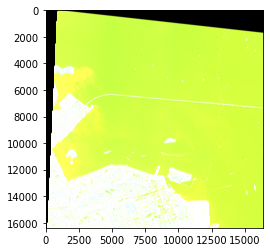

In [34]:
plt.imshow(q)

In [20]:
!pip install rasterio

  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/c1/17/f408777ddee5f5df4fb2e2fe5eddf90471df977ef91adc9e9ac5ea491610/rasterio-1.3.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl (5.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 26.6 MB/s eta 0:00:0000:01m0:01


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


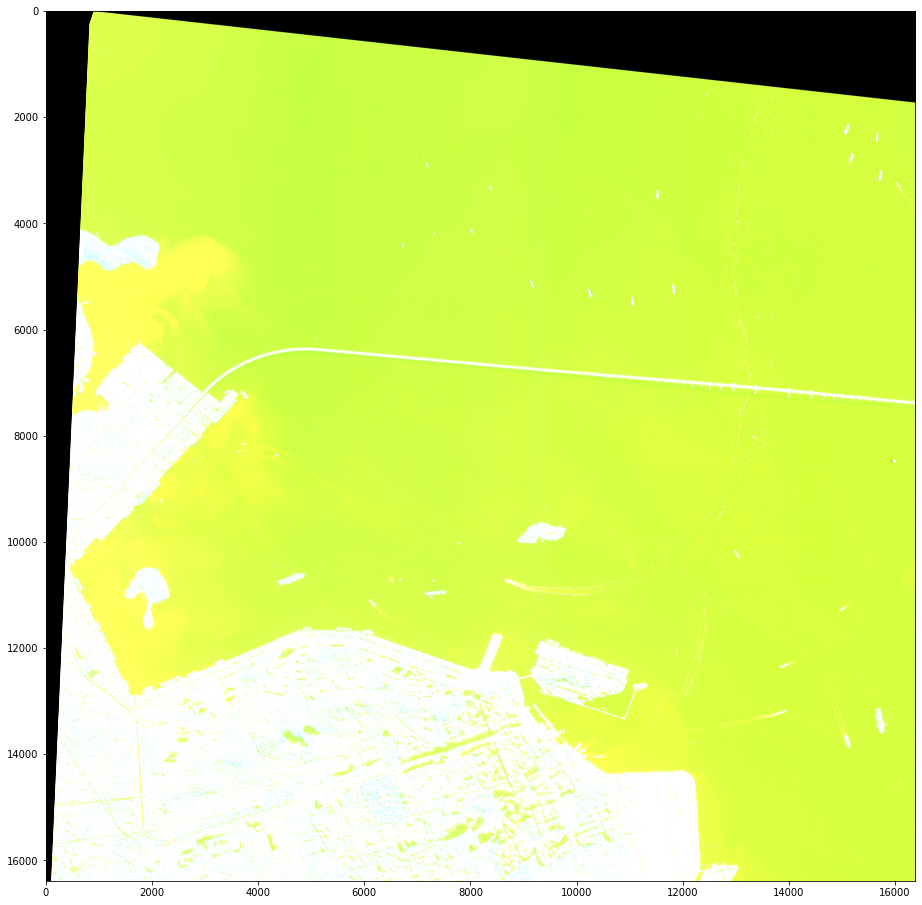

In [15]:
q = np.transpose( img[1:4,:,:], (1,2,0) )
img_array  =np.array(q)

plt.figure(figsize=(16,16))
plt.imshow(img_array)